### 軌道追従アルゴリズムのデモ

In [1]:
import sys
sys.path.append('../')

from ipywidgets import RadioButtons, FloatSlider

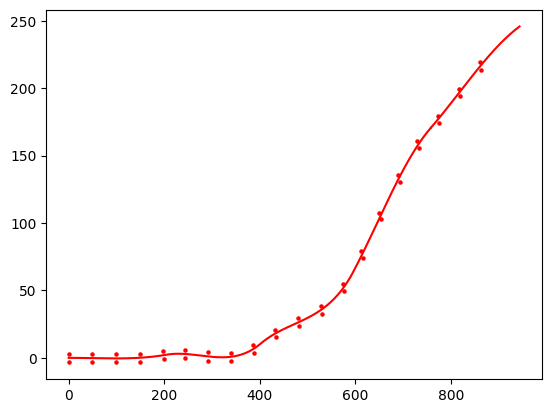

In [2]:
from control.pure_pursuit import PurePursuit
from control.PID import PID, PIDHandle
from vehicle import Vehicle
from track import Track
from simulation import Simulation, show_img

class DoNothing:
    def get_control(**kwargs):
        return 0

vehicle = Vehicle(x=0, y=0, velocity=0, heading=0, wheel_base=2.6)
track = Track() 
handle_controller = DoNothing
pedal_controller = DoNothing

track.plot()

In [3]:
hanctl = RadioButtons(options=['PurePursuit', 'PID'],
                   value = 'PID',   
                   description='', disabled=False)
pedctl = RadioButtons(options=['なし（速度一定）', 'PID'],
                   value = 'なし（速度一定）',   
                   description='', disabled=False)

print("軌道追従アルゴリズムを選択")
display(hanctl)
print("速度制御アルゴリズムを選択")
display(pedctl)

軌道追従アルゴリズムを選択


RadioButtons(index=1, options=('PurePursuit', 'PID'), value='PID')

速度制御アルゴリズムを選択


RadioButtons(options=('なし（速度一定）', 'PID'), value='なし（速度一定）')

In [4]:
if hanctl.value == 'PurePursuit':
        print("軌道追従アルゴリズム(PurePursuit)のパラメータを設定")
        Kdd = FloatSlider(value=0.4, min=0, max=3.0, step=0.1, description='Kdd=', readout_format='.1f',)
        display(Kdd)
elif hanctl.value == 'PID':
        print("軌道追従アルゴリズム(PID)のパラメータを設定") 
        h_Kp = FloatSlider(value=0, min=0, max=1.0, step=0.1, description='Kp=', readout_format='.1f',)
        h_Ki = FloatSlider(value=0, min=0, max=1.0, step=0.1, description='Ki=', readout_format='.1f',)
        h_Kd = FloatSlider(value=0, min=0, max=1.0, step=0.1, description='Kd=', readout_format='.1f',)
        display(h_Kp)
        display(h_Ki)
        display(h_Kd)

軌道追従アルゴリズム(PID)のパラメータを設定


FloatSlider(value=0.0, description='Kp=', max=1.0, readout_format='.1f')

FloatSlider(value=0.0, description='Ki=', max=1.0, readout_format='.1f')

FloatSlider(value=0.0, description='Kd=', max=1.0, readout_format='.1f')

In [5]:

print("目標速度を設定")
desired_velocity = FloatSlider(value=25, min=0, max=30.0, step=0.1, description='目標速度=', readout_format='.1f',)
display(desired_velocity)

if pedctl.value == 'なし（速度一定）':
    print()
elif pedctl.value == 'PID':
    print("速度制御アルゴリズム(PID)のパラメータを設定")
    p_Kp = FloatSlider(value=3, min=0, max=10.0, step=0.1, description='Kp=', readout_format='.1f',)
    p_Ki = FloatSlider(value=0, min=0, max=10.0, step=0.1, description='Ki=', readout_format='.1f',)
    p_Kd = FloatSlider(value=0, min=0, max=10.0, step=0.1, description='Kd=', readout_format='.1f',)
    display(p_Kp)
    display(p_Ki)
    display(p_Kd)

目標速度を設定


FloatSlider(value=25.0, description='目標速度=', max=30.0, readout_format='.1f')

In [11]:
from IPython.display import clear_output

if hanctl.value == 'PID':
    handle_controller = PIDHandle(Kp=h_Kp.value, Ki=h_Ki.value, Kd=h_Kd.value, set_point=0)
elif hanctl.value == 'PurePursuit':
    handle_controller = PurePursuit(Kdd=Kdd.value)

if pedctl.value == 'なし（速度一定）':
    vehicle.velocity = desired_velocity.value
elif pedctl.value == 'PID':
    pedal_controller = PID(Kp=p_Kp.value, Ki=p_Ki.value, Kd=p_Kd.value, set_point=desired_velocity.value)

sim = Simulation(vehicle, track, handle_controller, pedal_controller)

memo = []
img_list = []
for i in range(1, 1000):
    try:
        sim.step()
        # visualization
        img = sim.cv_plot()
        if i%2==0:
            img_list.append(img)
            #show_img(img)
        #clear_output(wait=True)
        # check for simulation end
        memo.append((vehicle.x, vehicle.y, len(sim.waypoints)))
        if len(sim.waypoints) < 10:
            break

    except KeyboardInterrupt:
        break

0.0 -0.00027835664114191734
0.0 -0.00027835664114191734
0.0 -0.00027835664114191734
0.0 -0.00027835664114191734
0.0020183482300972816 -0.00027835664114191734
0.004945424689142244 -0.000472428596884868
0.0026099039823824447 -0.0009479503566759984
0.002731218294341295 -0.001198902685466132
0.002816809507845158 -0.001461519855272886
0.0028701125367341118 -0.0017323669519884342
0.002894232015110512 -0.0020083393416009286
0.002891974054630293 -0.0022866309125971524
3.0791738435938356 -0.0025647053719360506
0.3365857429316657 -0.3427760058671339
2.677945044588987 -0.3751889952930419
2.677945044588987 -0.6605012386531419
0.9584584124644414 -0.945813482013242
2.0344439357957027 -1.0391186083446005
0.0 -1.246299980209219
0.0 -1.246299980209219
1.2678095988392897 -1.246299980209219
1.8157749899217608 -1.3708863005909562
1.58474608040779 -1.5535830032537628
0 -1.7112786746811788


/home/ksrk/workspace/CEPlatform/python/tests/../control/PID.py:10: RuntimeWarning: invalid value encountered in scalar divide
  d = (x1 * y2 - x2 * y1)**2 / ((x2 - x1)**2 + (y2 - y1)**2)
/home/ksrk/workspace/CEPlatform/python/tests/geometry_util.py:25: RuntimeWarning: invalid value encountered in divide
  d = np.divide(d_ba, (np.hypot(d_ba[:, 0], d_ba[:, 1]).reshape(-1, 1)))


ValueError: zero-size array to reduction operation minimum which has no identity

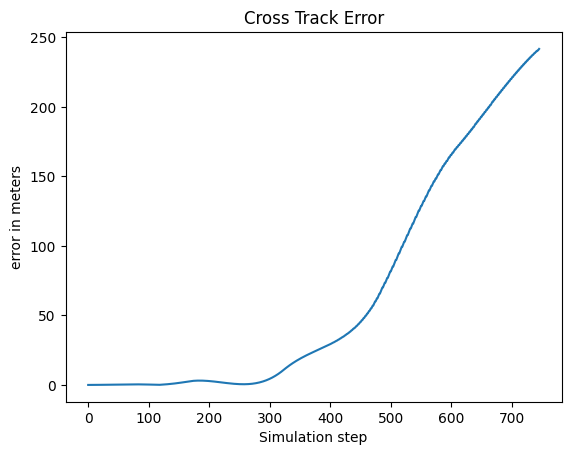

In [7]:
sim.plot_error()

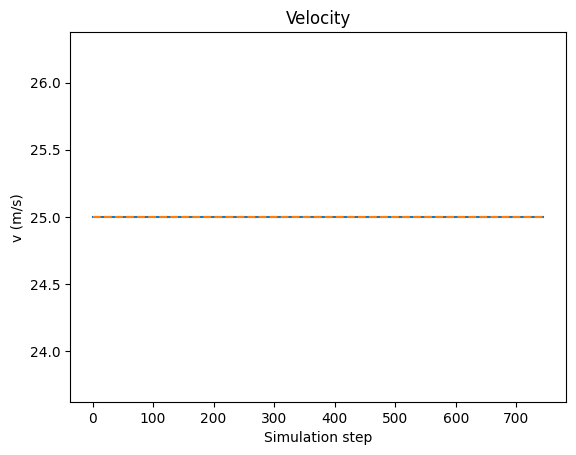

In [8]:
sim.plot_velocity()

In [9]:
import imageio
imageio.mimsave('control.gif', img_list, fps=20)

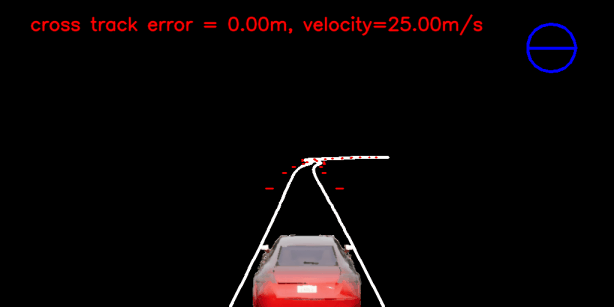

In [10]:
from IPython.display import Image
Image(open('control.gif','rb').read())